<a href="https://colab.research.google.com/github/ma22c041/ma22c041_2023_PL/blob/main/Assignment9/growTh_covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'


In [12]:

data = pd.read_csv(url)
data.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,19732,19759,19759,19759,19759,19759,19759,19759,19790,19790
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,69641,69767,69767,69767,69767,69767,69767,69767,69860,69860
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,7451,7474,7474,7474,7474,7474,7474,7474,7485,7485
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,8067,8087,8087,8087,8087,8087,8087,8087,8091,8091
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,18616,18673,18673,18673,18673,18673,18673,18673,18704,18704


In [13]:
if 'data' in locals() and 'Province_State' in data.columns:
    states = ['Oregon', 'Washington', 'California']
    state_data = data[data['Province_State'].isin(states)]
    num_records = len(state_data)

    print(f"Number of records in Oregon, Washington, and California: {num_records}")
else:
    print("The 'data' DataFrame or 'Province_State' column does not exist.")

Number of records in Oregon, Washington, and California: 139


In [14]:
# Drop un necessary columns  in the DataFrame
columns_to_drop = ['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Country_Region', 'Lat', 'Long_', 'Combined_Key']
state_data = state_data.drop(columns=[col for col in columns_to_drop if col in state_data.columns])
state_data.head()


,Province_State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
197,California,0,0,0,0,0,0,0,0,0,...,401161,401161,401161,401161,401161,401161,401161,402158,402158,402160
198,California,0,0,0,0,0,0,0,0,0,...,143,143,143,143,143,143,143,143,143,143
199,California,0,0,0,0,0,0,0,0,0,...,11540,11540,11540,11540,11540,11540,11540,11553,11553,11553
200,California,0,0,0,0,0,0,0,0,0,...,51916,51916,51916,51916,51916,51916,51916,51967,51967,51967
201,California,0,0,0,0,0,0,0,0,0,...,9634,9634,9634,9634,9634,9634,9634,9650,9650,9650


In [15]:
state_data=state_data.groupby('Province_State').sum().T

Text(0, 0.5, 'Confirmed COVID_19 cases')

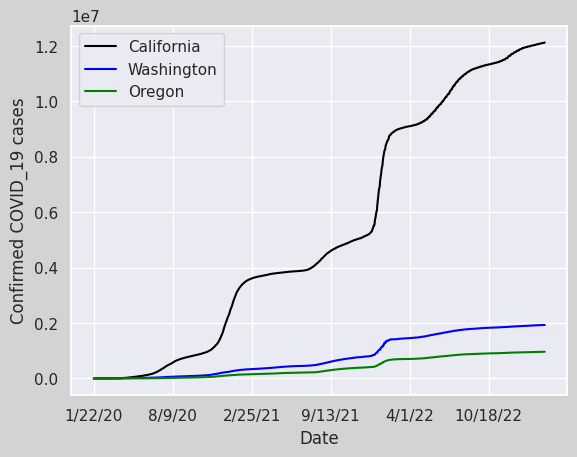

In [16]:
fig, ax = plt.subplots()
fig.set_facecolor('lightgray')
state_data['California'].plot(color="black")
state_data['Washington'].plot(color="blue")
state_data['Oregon'].plot(color="green")
plt.legend()
plt.axis()
plt.xlabel("Date")
plt.ylabel("Confirmed COVID_19 cases")